In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Load the dataset (adjust path if necessary)
df = pd.read_csv('D:\Kartikey\Project\.venv\Preprocessed dataset.csv')

# Split into features and target
X = df.drop(columns=[' Label'])  # assuming the target is in the 'Label' column
y = df[' Label']

# Convert labels to numeric values if they are categorical
y = pd.get_dummies(y).values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


<>:10: SyntaxWarning: invalid escape sequence '\K'
<>:10: SyntaxWarning: invalid escape sequence '\K'
D:\Kartikey\Project\temp\ipykernel_212724\713115419.py:10: SyntaxWarning: invalid escape sequence '\K'
  df = pd.read_csv('D:\Kartikey\Project\.venv\Preprocessed dataset.csv')


In [4]:
class ANNModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)  # Softmax for multi-class classification
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Initialize the model
input_size = X_train.shape[1]  # Number of features
output_size = y_train.shape[1]  # Number of classes (based on the label encoding)
model = ANNModel(input_size, output_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [8]:
# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, torch.max(y_train_tensor, 1)[1])  # Convert one-hot to class indices
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Print loss for every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")



Epoch [10/5000], Loss: 1.9004
Epoch [20/5000], Loss: 1.8996
Epoch [30/5000], Loss: 1.8989
Epoch [40/5000], Loss: 1.8983
Epoch [50/5000], Loss: 1.8976
Epoch [60/5000], Loss: 1.8970
Epoch [70/5000], Loss: 1.8964
Epoch [80/5000], Loss: 1.8959
Epoch [90/5000], Loss: 1.8954
Epoch [100/5000], Loss: 1.8949
Epoch [110/5000], Loss: 1.8945
Epoch [120/5000], Loss: 1.8942
Epoch [130/5000], Loss: 1.8939
Epoch [140/5000], Loss: 1.8937
Epoch [150/5000], Loss: 1.8935
Epoch [160/5000], Loss: 1.8933
Epoch [170/5000], Loss: 1.8932
Epoch [180/5000], Loss: 1.8931
Epoch [190/5000], Loss: 1.8930
Epoch [200/5000], Loss: 1.8929
Epoch [210/5000], Loss: 1.8928
Epoch [220/5000], Loss: 1.8928
Epoch [230/5000], Loss: 1.8927
Epoch [240/5000], Loss: 1.8926
Epoch [250/5000], Loss: 1.8926
Epoch [260/5000], Loss: 1.8925
Epoch [270/5000], Loss: 1.8925
Epoch [280/5000], Loss: 1.8924
Epoch [290/5000], Loss: 1.8924
Epoch [300/5000], Loss: 1.8924
Epoch [310/5000], Loss: 1.8923
Epoch [320/5000], Loss: 1.8923
Epoch [330/5000],

In [9]:
# Testing phase
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted_classes = torch.argmax(outputs, 1)
    true_classes = torch.argmax(y_test_tensor, 1)

# Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


Accuracy on test set: 94.34%


d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 339s 976us/step - accuracy: 0.7263 - loss: 0.8352 - val_accuracy: 0.8498 - val_loss: 0.4495
Epoch 2/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 325s 941us/step - accuracy: 0.9004 - loss: 0.2443 - val_accuracy: 0.9091 - val_loss: 0.3171
Epoch 3/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 308s 893us/step - accuracy: 0.9131 - loss: 0.1994 - val_accuracy: 0.9241 - val_loss: 0.2648
Epoch 4/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 317s 919us/step - accuracy: 0.9189 - loss: 0.1801 - val_accuracy: 0.9314 - val_loss: 0.2324
Epoch 5/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 317s 919us/step - accuracy: 0.9225 - loss: 0.1687 - val_accuracy: 0.9376 - val_loss: 0.2175
Epoch 6/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 319s 925us/step - accuracy: 0.9249 - loss: 0.1611 - val_accuracy: 0.9403 - val_loss: 0.2065
Epoch 7/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 322s 933us/step - accuracy: 0.9271 - loss: 0.1553 - val_accuracy: 0.9453 - val_loss: 0.1904
Epoch 8/50
343721/343721 ━━━━━━━━━

Test Accuracy: 96.63%
23633/23633 ━━━━━━━━━━━━━━━━━━━━ 17s 734us/step

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.96      0.98    628518
                       Bot       0.07      1.00      0.13       584
                      DDoS       0.96      1.00      0.98     38404
             DoS GoldenEye       0.86      1.00      0.92      3086
                  DoS Hulk       0.97      1.00      0.98     51854
          DoS Slowhttptest       0.77      1.00      0.87      1568
             DoS slowloris       0.92      0.99      0.95      1616
               FTP-Patator       0.85      1.00      0.92      1779
                Heartbleed       0.08      1.00      0.15         3
              Infiltration       0.05      0.82      0.09        11
                  PortScan       0.74      1.00      0.85     27208
               SSH-Patator       0.78      1.00      0.87       966
  Web Attack � Brute 

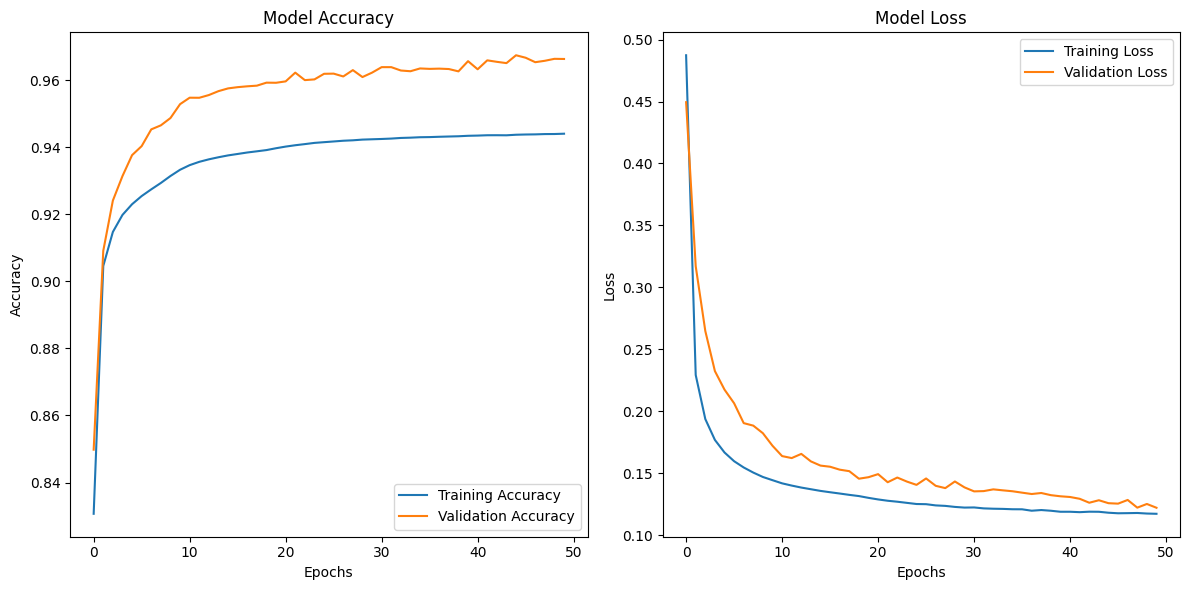

In [1]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTe
smote = SMOTE(random_state=42)  # Use all available cores
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Set a custom learning rate
learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the FNN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=50, batch_size=64, 
                    validation_data=(X_test, y_test))

# Save the model
model.save('fnn_model_with_lr.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 550s 2ms/step - accuracy: 0.8151 - loss: 0.5486 - val_accuracy: 0.9156 - val_loss: 0.2942
Epoch 2/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 525s 2ms/step - accuracy: 0.9211 - loss: 0.1676 - val_accuracy: 0.9294 - val_loss: 0.2308
Epoch 3/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 540s 2ms/step - accuracy: 0.9276 - loss: 0.1466 - val_accuracy: 0.9385 - val_loss: 0.1921
Epoch 4/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 542s 2ms/step - accuracy: 0.9317 - loss: 0.1369 - val_accuracy: 0.9447 - val_loss: 0.1726
Epoch 5/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 546s 2ms/step - accuracy: 0.9362 - loss: 0.1307 - val_accuracy: 0.9492 - val_loss: 0.1674
Epoch 6/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 558s 2ms/step - accuracy: 0.9398 - loss: 0.1263 - val_accuracy: 0.9534 - val_loss: 0.1567
Epoch 7/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 554s 2ms/step - accuracy: 0.9416 - loss: 0.1228 - val_accuracy: 0.9559 - val_loss: 0.1486
Epoch 8/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 56

Test Accuracy with doubled neurons: 97.48%
23633/23633 ━━━━━━━━━━━━━━━━━━━━ 19s 786us/step

Classification Report (doubled neurons):
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.97      0.98    628518
                       Bot       0.12      1.00      0.22       584
                      DDoS       0.99      1.00      1.00     38404
             DoS GoldenEye       0.92      1.00      0.96      3086
                  DoS Hulk       0.96      1.00      0.98     51854
          DoS Slowhttptest       0.83      1.00      0.91      1568
             DoS slowloris       0.96      0.99      0.98      1616
               FTP-Patator       1.00      1.00      1.00      1779
                Heartbleed       0.14      1.00      0.24         3
              Infiltration       0.15      0.82      0.25        11
                  PortScan       0.74      1.00      0.85     27208
               SSH-Patator       0.85      1.00   

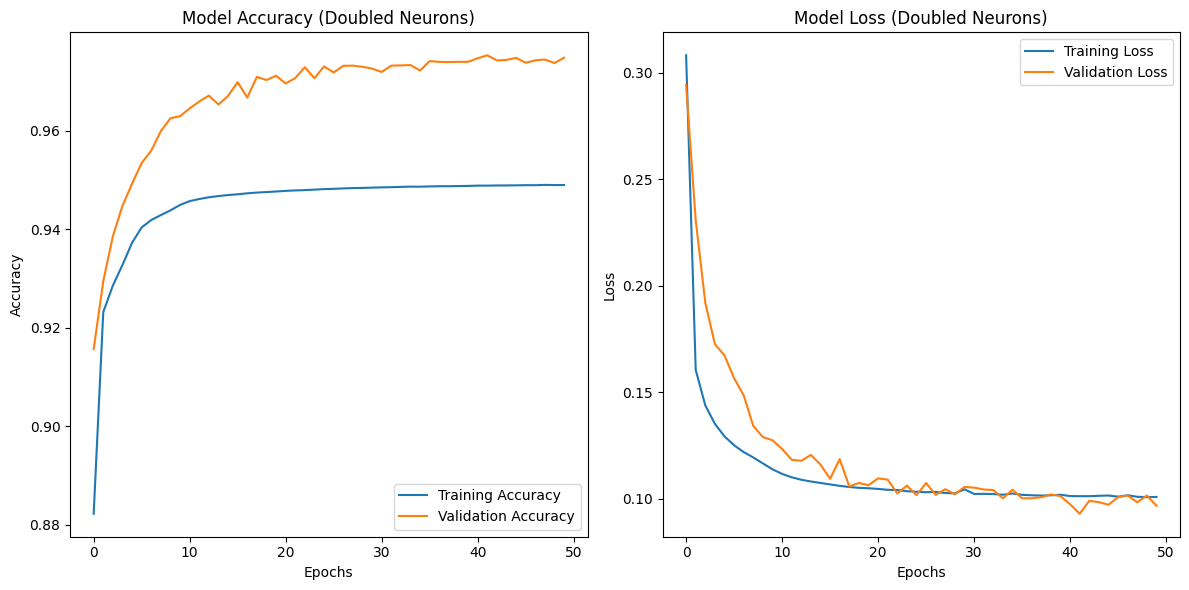

In [2]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Set a custom learning rate
learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the FNN model with doubled neurons
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_resampled.shape[1],)),  # 128 -> 256
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),  # 64 -> 128
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),  # 32 -> 64
    layers.Dropout(0.3),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')  # Output layer remains the same
])

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=50, batch_size=64, 
                    validation_data=(X_test, y_test))

# Save the model
model.save('fnn_model_with_lr_double_neurons.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy with doubled neurons: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report (doubled neurons):")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss for the updated model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy (Doubled Neurons)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss (Doubled Neurons)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Set a custom learning rate
learning_rate = 0.00005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the FNN model with eight times the neurons
model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(X_train_resampled.shape[1],)),  # 512 -> 1024
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),  # 256 -> 512
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),  # 128 -> 256
    layers.Dropout(0.3),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')  # Output layer remains the same
])

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=50, batch_size=64, 
                    validation_data=(X_test, y_test))

# Save the model
model.save('fnn_model_eight_times_neurons.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy with eight times neurons: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report (eight times neurons):")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss for the updated model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy (Eight Times Neurons)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss (Eight Times Neurons)')

plt.tight_layout()
plt.show()


d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2432s 7ms/step - accuracy: 0.9217 - loss: 0.1729 - val_accuracy: 0.9616 - val_loss: 0.1313
Epoch 2/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2569s 7ms/step - accuracy: 0.9441 - loss: 0.1110 - val_accuracy: 0.9652 - val_loss: 0.1232
Epoch 3/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2597s 8ms/step - accuracy: 0.9455 - loss: 0.1084 - val_accuracy: 0.9675 - val_loss: 0.1209
Epoch 4/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2549s 7ms/step - accuracy: 0.9462 - loss: 0.1064 - val_accuracy: 0.9690 - val_loss: 0.1226
Epoch 5/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2571s 7ms/step - accuracy: 0.9466 - loss: 0.1053 - val_accuracy: 0.9696 - val_loss: 0.1319
Epoch 6/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2522s 7ms/step - accuracy: 0.9466 - loss: 0.1060 - val_accuracy: 0.9703 - val_loss: 0.1351
Epoch 7/50
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2529s 7ms/step - accuracy: 0.9469 - loss: 0.1056 - val_accuracy: 0.9700 - val_loss: 0.1475
Epoch 8/50
343721/343721 ━━━━━━━━━━━━━━━━

Epoch 1/30


c:\Users\kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7121 - loss: 1.0411 - val_accuracy: 0.9547 - val_loss: 0.1509
Epoch 2/30
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9532 - loss: 0.1746 - val_accuracy: 0.9695 - val_loss: 0.1022
Epoch 3/30
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9693 - loss: 0.1204 - val_accuracy: 0.9789 - val_loss: 0.0821
Epoch 4/30
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.1064 - val_accuracy: 0.9789 - val_loss: 0.0760
Epoch 5/30
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9781 - loss: 0.0893 - val_accuracy: 0.9806 - val_loss: 0.0690
Epoch 6/30
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0825 - val_accuracy: 0.9812 - val_loss: 0.0641
Epoch 7/30
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9804 - loss: 0.0754 - val_accuracy: 0.9817 - val_loss: 0.0650
Epoch 8/30
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9799 - loss: 0.0719 - val_accuracy: 0.9832 - val_

Test Accuracy : 99.05%
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step

Classification Report :
                  precision    recall  f1-score   support

          BENIGN       0.99      0.96      0.98      1500
            DDoS       1.00      1.00      1.00      1500
   DoS GoldenEye       0.99      1.00      0.99      1500
        DoS Hulk       0.99      0.99      0.99      1500
DoS Slowhttptest       0.99      0.99      0.99      1500
   DoS slowloris       0.99      0.99      0.99      1500
     FTP-Patator       0.99      1.00      1.00      1500
   Other Attacks       0.98      0.99      0.98       966
        PortScan       0.99      1.00      1.00      1500

        accuracy                           0.99     12966
       macro avg       0.99      0.99      0.99     12966
    weighted avg       0.99      0.99      0.99     12966



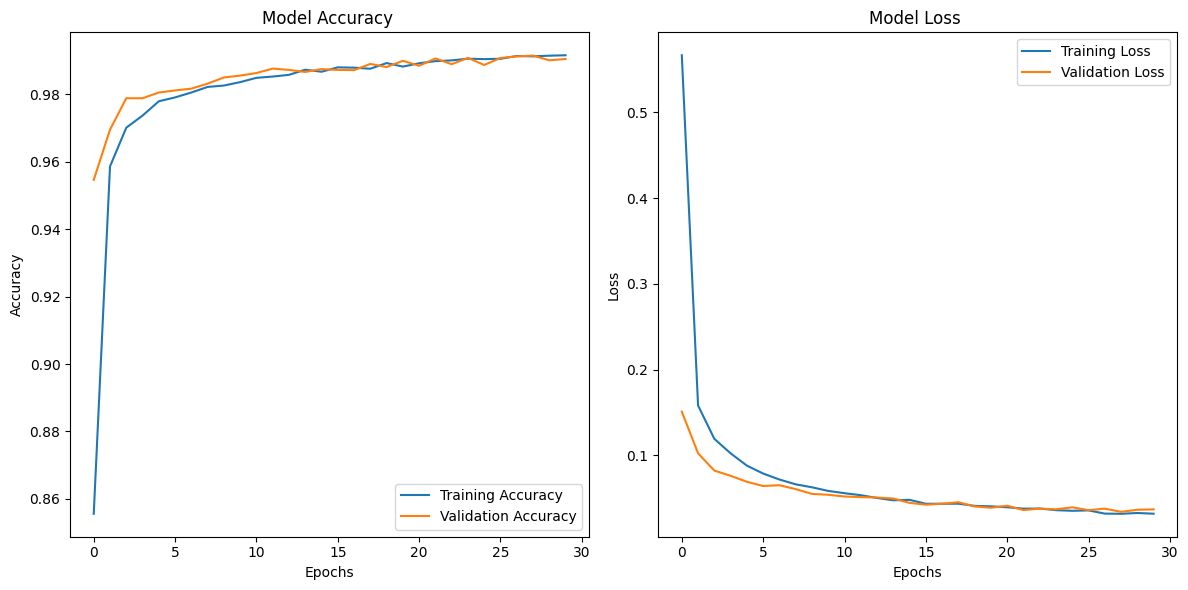

In [4]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'D:\Kartikey\.venv\balanced.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Attack Type']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Set a custom learning rate
learning_rate = 0.00008
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the FNN model with eight times the neurons
model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(X_train_resampled.shape[1],)),  # 512 -> 1024
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),  # 256 -> 512
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),  # 128 -> 256
    layers.Dropout(0.3),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')  # Output layer remains the same
])

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=30, batch_size=64, 
                    validation_data=(X_test, y_test))

# Save the model
model.save('balanced_fnn_model_eight_times_neurons.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy : {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report :")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss for the updated model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy ')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss ')

plt.tight_layout()
plt.show()